<a href="https://colab.research.google.com/github/23raksh/23raksh/blob/main/Machine_Learning_for_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dia = pd.read_csv('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv')

In [ ]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(dia.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
dia.shape

(768, 9)

The Diabetes dataset consists of 768 data points, with 9 features each.

In [ ]:
print(dia.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


Outcome 0 means No diabetes, outcome 1 means diabetes.

<ipython-input-8-dd8046bc622b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = dia['Outcome'], palette="Blues")


<Axes: xlabel='Outcome', ylabel='count'>

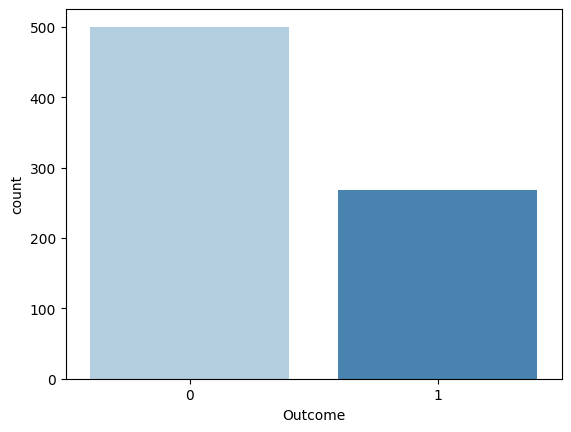

In [ ]:
import seaborn as sns
sns.countplot(x = dia['Outcome'], palette="Blues")

In [ ]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


K-Nearest Neighbors



The KNN algorithm is simple ML algorithm.

In [ ]:
#Lets invsetigate the connection between model complexity and accuracy
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dia.loc[:, dia.columns != 'Outcome'], dia['Outcome'], stratify=dia['Outcome'], random_state=66)

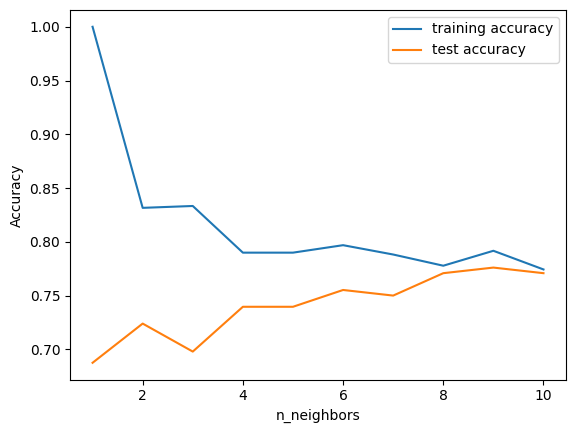

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy =[]
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(X_train, y_train)
  training_accuracy.append(knn.score(X_train, y_train))
  test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.savefig('knn_compare_model')

The plot shows the training and test accuracy on the y-axis against the setting of n_neighbors on the x-axis.
One single nearest neighbor, the prediction on the training set is perfect. But more number of neighbors considered, the training accuracy drops.

In [ ]:
#The above plot suggests that we should choose n_neighbors=9. Here we are:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

print('Accuracy of KNN Classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)*100))
print('Accuracy of KNN Classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)*100))

Accuracy of KNN Classifier on training set: 79.17
Accuracy of KNN Classifier on test set: 77.60


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Training set accuracy: 0.788
Test set accuracy: 0.766


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Training set accuracy: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('Test set accuracy: {:.3f}'.format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.762
Test set accuracy: 0.760


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set accuracy: 0.783
Test set accuracy: 0.781


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using C=100 results in a little bit higher accuracy on trainng set little bit lower accuracy on test set, confirming that less regularization and a more complex model may not generalize better than default setting.

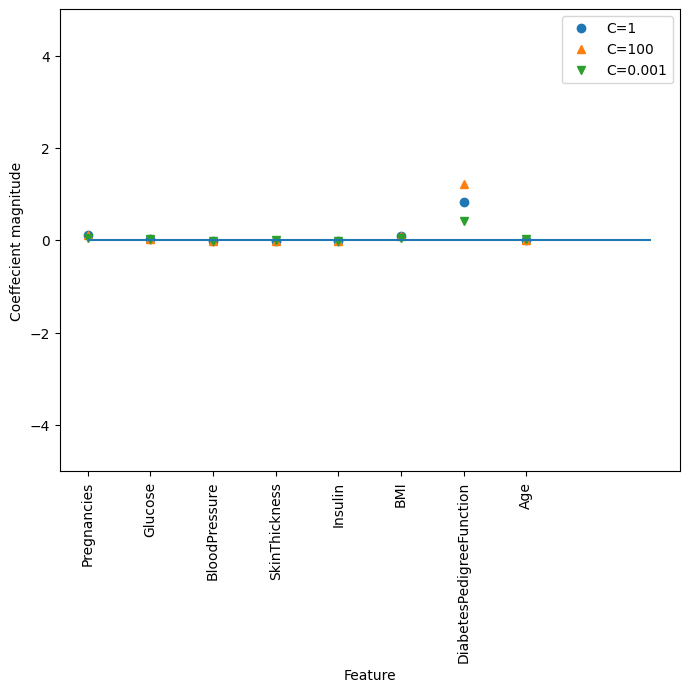

In [ ]:
dia_features = [x for i,x in enumerate(dia.columns) if i!=8]

plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(dia.shape[1]-1), dia_features, rotation=90)
plt.hlines(0, 0, dia.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coeffecient magnitude")
plt.legend()
plt.savefig('log_coef')

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.714


The accuracy on the training set is 100% while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. We need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decraeses overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [ ]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.773
Accuracy on test set: 0.740


Feature Importance in Decision trees

Feature importance rates how important each feature is for the decision a tree makes.

In [ ]:
print("Feature importance: \n{}".format(tree.feature_importances_))


Feature importance: 
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


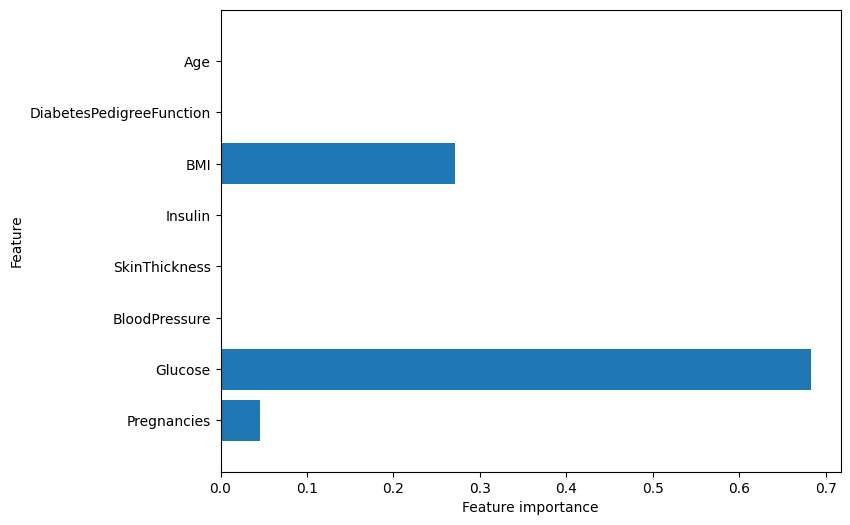

In [ ]:
def plot_feature_importances_diabetes(model):
  plt.figure(figsize=(8,6))
  n_features = 8
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), dia_features)
  plt.xlabel("Feature importance")
  plt.ylabel('Feature')
  plt.ylim(-1, n_features)


plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

Feature "Glucose" is by far the most important feature.

## Random Forest

In [ ]:
#lets apply a random forest consisting of 100 trees on the diabetes dataset:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.786


The random forest gives us an accuracy of 78.6% better than the logistic regression model or a single decision tree, without tuning any parameters. However, we can adjust the max_features setting, to see whether the result can be improved.

In [ ]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(rf1.score(X_train, y_train)))
print('Accuracy on test set: {:3f}'.format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.800
Accuracy on test set: 0.755208


## Feature Importance in Random Forest

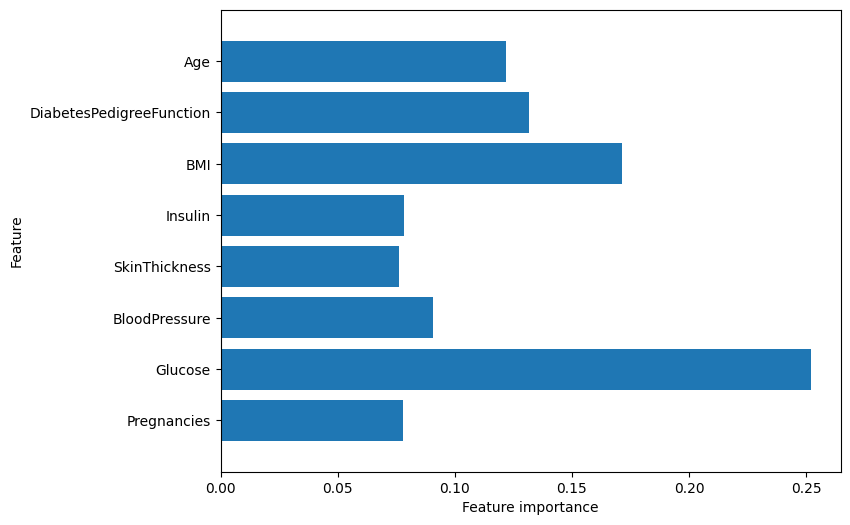

In [ ]:
plot_feature_importances_diabetes(rf)

Similarly to the single decision tree, the random forest also gives a lot of importance to the 'Glucose' feature, but it also chooses 'BMI' to be the 2nd most informative feature overall.


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(gb.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(gb.score(X_test, y_test)))

Accuracy on training set: 0.917
Accuracy on test set: 0.792


Its Overfitting. To overcome we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate.

In [ ]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(gb1.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(gb1.score(X_test, y_test)))

Accuracy on training set: 0.804
Accuracy on test set: 0.781


In [ ]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(gb2.score(X_train, y_train)))
print('Accuracy on testing set: {:.3f}'.format(gb2.score(X_test, y_test)))


Accuracy on training set: 0.802
Accuracy on testing set: 0.776


Both methods of decreasing the model complexity reduced the training set accuracy, as expected.
We can visualize the feature importance to get more insight into our model even though we are not really happy with the model.

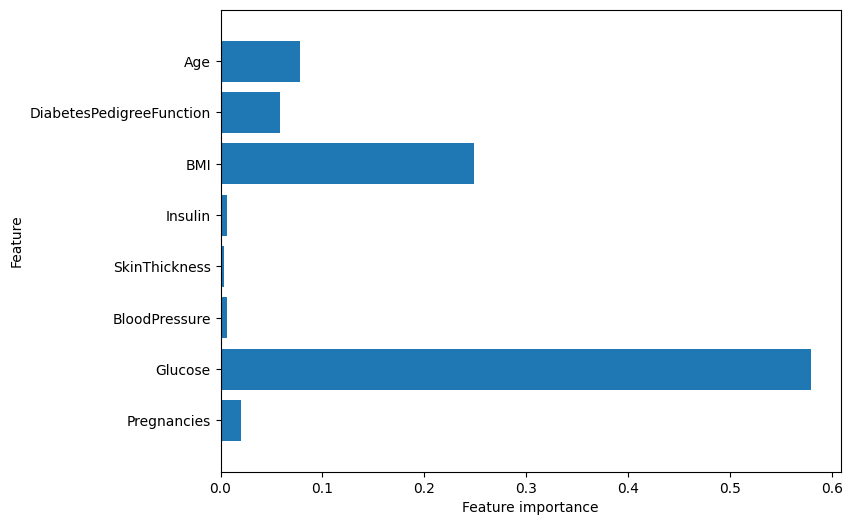

In [ ]:
plot_feature_importances_diabetes(gb1)

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on testing set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.77
Accuracy on testing set: 0.76


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.944
Accuracy on test set: 0.719


We practised a wide array of Machine Learning models for classification and regression.